# Import Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

# scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reading Data

In [11]:
df = pd.read_csv("data/boston_house.csv")

In [12]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
# Drop unnecessary and unethic features
df.drop(['Unnamed: 0','black'], axis=1, inplace=True)

In [14]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Understanding Data

**Data Description**

crim - per capita crime rate by town

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

nox - nitric oxides concentration (parts per 10 million)

rm - average number of rooms per dwelling

age - proportion of owner-occupied units built prior to 1940

dis - weighted distances to five Boston employment centres

rad - index of accessibility to radial highways

tax - full-value property-tax rate per $10,000

ptratio - pupil-teacher ratio by town

lstat - % lower status of the population

medv - Median value of owner-occupied homes in $1000's


In [16]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [19]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [20]:
#Summarizing the stats of data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [22]:
# Check the missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

# EDA

In [30]:
# Check correlation 
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<AxesSubplot:>

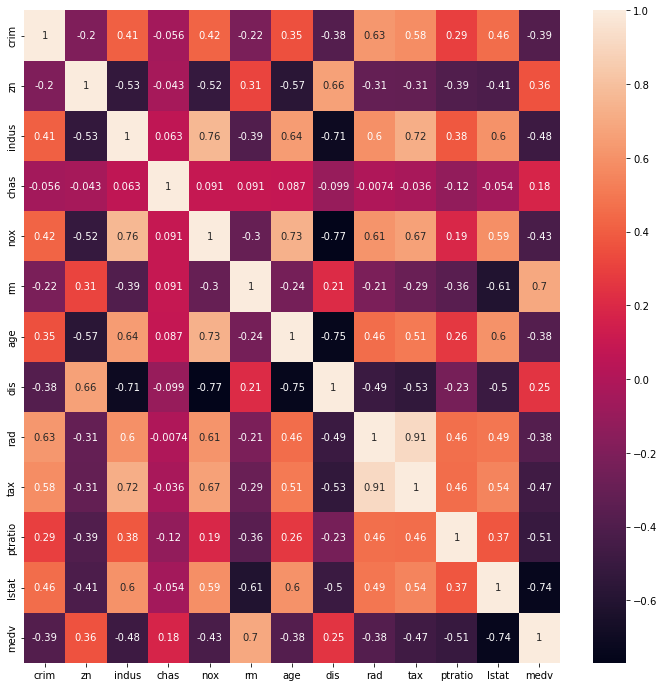

In [29]:
# Visualize correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [66]:
# Split features and target
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

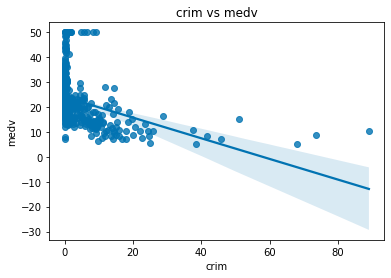

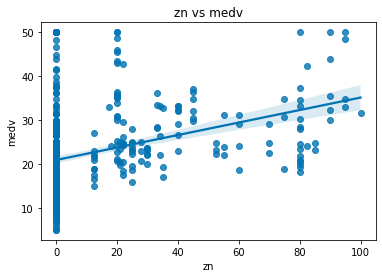

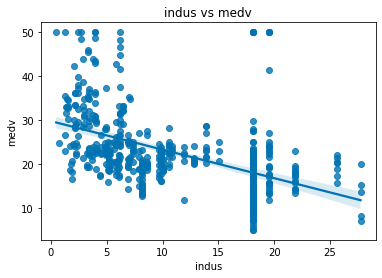

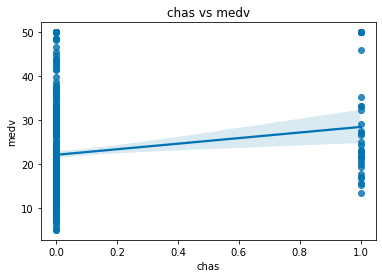

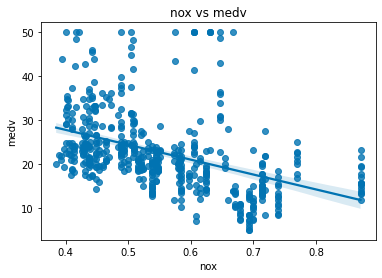

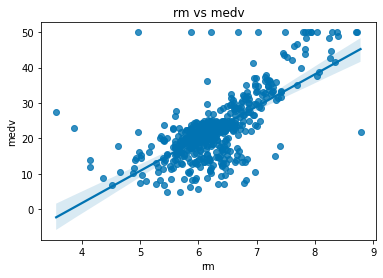

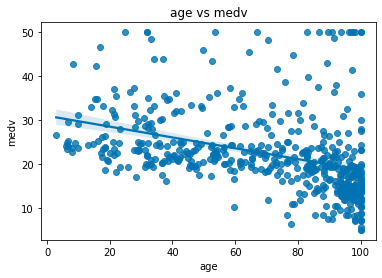

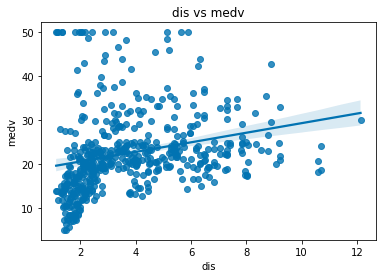

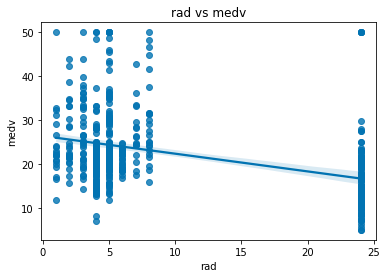

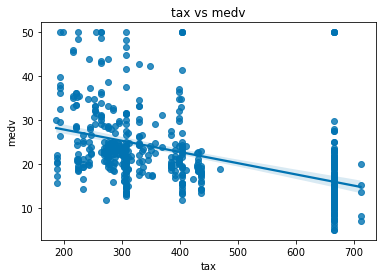

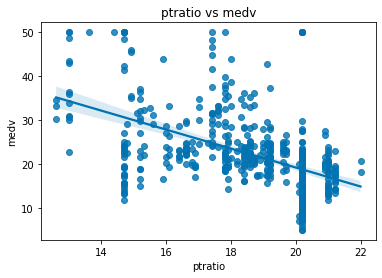

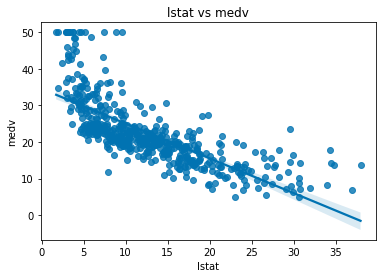

In [67]:
sns.set_palette("Paired")
# Visualize relationship between each feture and target
for col in features:
    sns.set_palette("colorblind")
    sns.regplot(x = df[col], y = df['medv'])
    plt.title("{} vs medv".format(col))
    plt.show()

# Data Pre-Processing

In [129]:
## Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)
print("X_train size : {}\nX_test size : {}".format(X_train.shape, X_test.shape))

X_train size : (354, 12)
X_test size : (152, 12)


In [130]:
# Standardize X_train, X_test dataset 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## Multiple Linear Regression

In [131]:
# Train the Linear Regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [132]:
# Print the coefficients and intercept for regression line
print("intercept = {}".format(regression.intercept_))
print("coefficients = {}".format(regression.coef_))


intercept = 23.01581920903955
coefficients = [-1.16096196  0.81544469  0.25150446  0.90388642 -1.86406727  2.8008198
 -0.24506311 -2.94795852  1.89664169 -1.52987704 -2.00684723 -4.07422149]


In [133]:
# Make prediction with test data
y_pred = regression.predict(X_test)
y_pred

array([28.57094774, 36.81549468, 14.77342714, 25.40879164, 17.83709907,
       23.16449335, 17.15522701, 13.49000152, 22.13052286, 20.28195952,
       24.78234243, 18.30984099, -4.85443361, 21.6241052 , 19.24399263,
       25.34909243, 20.11888967,  4.57693599, 40.32947719, 16.4011725 ,
       27.42039613, 30.09145823, 11.07523442, 23.96296133, 17.90714413,
       15.47494417, 22.94468805, 17.87544105, 22.49189601, 19.03202569,
       22.06247478, 25.11072892, 24.04433573, 17.86692173, 16.25957928,
       18.44827257, 30.96796371, 20.17403234, 24.19001512, 24.95168383,
       13.5253433 , 31.7582742 , 42.47240344, 17.52748697, 27.07696462,
       16.16466286, 14.07453935, 26.10426805, 19.26722596, 30.11274101,
       21.06774008, 34.11059788, 15.33667916, 25.964418  , 39.13846857,
       22.10873004, 17.84275474, 33.09663034, 24.80711674, 12.76610932,
       22.46769932, 30.75208688, 31.64525856, 17.49348348, 21.3470605 ,
       16.64731915, 19.24441479, 26.15659269, 31.14392822, 15.38

Text(0, 0.5, 'Predicted medv')

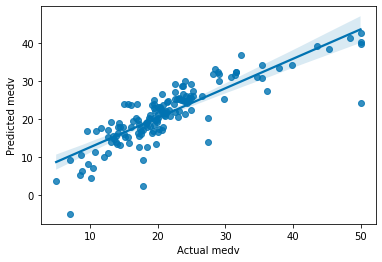

In [134]:
# Visualize actual and predicted values
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual medv")
plt.ylabel('Predicted medv')

In [135]:
# Check Residuals
residuals = y_test-y_pred
residuals

173    -4.970948
274    -4.415495
491    -1.173427
72     -2.608792
452    -1.737099
         ...    
441     0.834959
23      1.315560
225    10.270386
433    -4.720224
447    -4.620123
Name: medv, Length: 152, dtype: float64

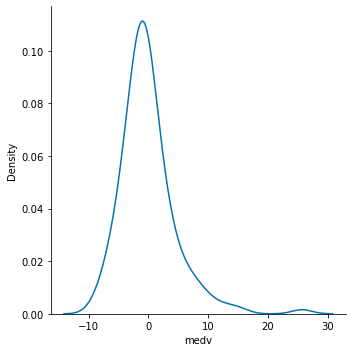

In [136]:
# Visualize residuals
sns.displot(residuals, kind='kde')
# residual are nearly normally distributed

Text(0, 0.5, 'Resiaduals')

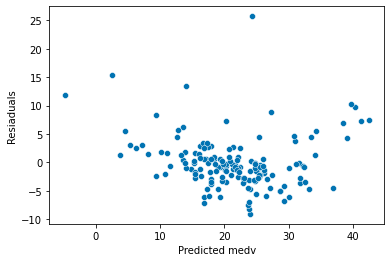

In [137]:
# Visualize relation between predicted values and residual
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted medv')
plt.ylabel('Resiaduals')

In [138]:
# Check Loss functions - MAE, MSE, RMSE
print('MAE : {}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE : {}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE : {}'.format(mean_squared_error(y_test,y_pred, squared=False)))

MAE : 3.188662231942635
MSE : 21.115450613869555
RMSE : 4.595155124026778


In [139]:
# Check performance metrics  - R2, adj R2

**R2 = 1 - SSR/SST**

SSR --> sum of squares of residuals

SST --> total sum of squares from the mean

**Adj-R2 = 1-[(1-r2)*(n-1)(n-k-1)]**

n= # of observations

k = # of predictors


In [142]:
r2_score = r2_score(y_test, y_pred)
print("R2 Score = {}".format(r2_score))

R2 Score = 0.7166209449097782


In [144]:
adj_r2 = 1-(1-r2_score)*(len(y_test)/(len(y_test)-X_test.shape[1]-1))
print("Adj-R2 Score = {}".format(adj_r2))      

Adj-R2 Score = 0.6901178678150093


In [161]:
# Predicting with new data
# First we need to apply pre processing steps to the new data
new_data= scaler.transform(np.array(df.iloc[0,:-1]).reshape(1,-1))
new_data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483, -1.04769976]])

In [162]:
# predict
regression.predict(new_data).reshape(1,-1)

array([[30.11274101]])

# Pickling The Model File For Deployement

In [168]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [169]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [170]:
pickled_model.predict(new_data)

array([30.11274101])